Import Iris Dataset

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualize data

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


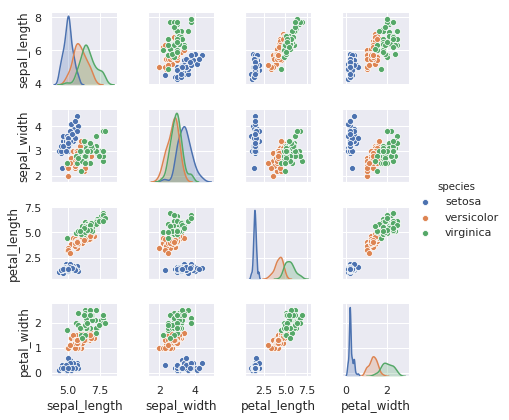

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris,hue='species',size=1.5)

Separate Features and Target

In [4]:
x_iris = iris.drop('species',axis=1)
x_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

### Machine Learning Steps
1) Choose a class of model by importing the model library from Scikit Learn <br/>
2) Choose model hyperparameters by instantiating this class with desired values <br/>
3) Arrange data into features matrix and target vector <br/>
4) Fit the model to the data <br/>
5) Apply the model to the data using predict() and transform()

### Supervised Learning Example: Linear Regression

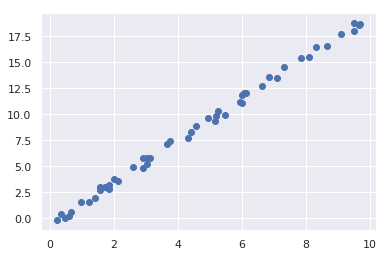

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2* x-1 + rng.rand(50)
plt.scatter(x,y)


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
#Initialize model with hyperparameters
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
#reshape x in the form [n_samples,n_features]
X = x[:,np.newaxis]
X.shape

(50, 1)

In [10]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The model parameters that were learnt during training have trailing underscores

In [11]:
model.coef_

array([2.00660766])

In [12]:
model.intercept_

-0.5350275750800026

We can use the StatsModels Python package to interpret the meaning of the fit parameters within the model

In [14]:
#generate x values for prediction
xfit = np.linspace(-1,11)

In [15]:
Xfit = xfit[:,np.newaxis]

In [16]:
yfit = model.predict(Xfit)

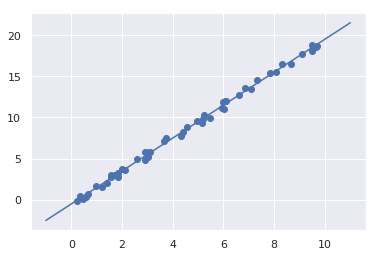

In [17]:
#Visualize training data
plt.scatter(x,y)
#Visualize prediction results
plt.plot(xfit,yfit)

### Supervised Learning Example: Iris Classification

For this classification problem, we will use the Gaussian Naive Bayes model. It is fast and has no hyperparameters, so it is a good model to use for baseline classification. 

In [21]:
#split data into training set and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

In [22]:
#model training
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [23]:
#determine accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

### Unsupervised Learning Example: Iris Dimensionality

The task of dimensionality reduction is to ask whether there is a suitable lower dimensional representation that retains the essential features of the data.

In [24]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x_iris)

#model transformed into 2 dimensions
X_2D = model.transform(x_iris)

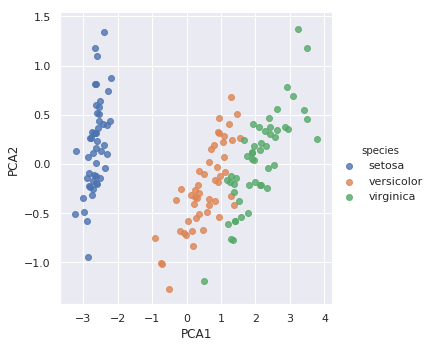

In [25]:
#Plot the results
#Iris data transformed into 2 dimensions
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised Learning: Clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels. We will use a clustering method called Gaussian Mixture Model, which models the data as a collection of Gaussian blobs. 

In [27]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)


Now, we will add the cluster label to the Iris Dataframe and plot the results

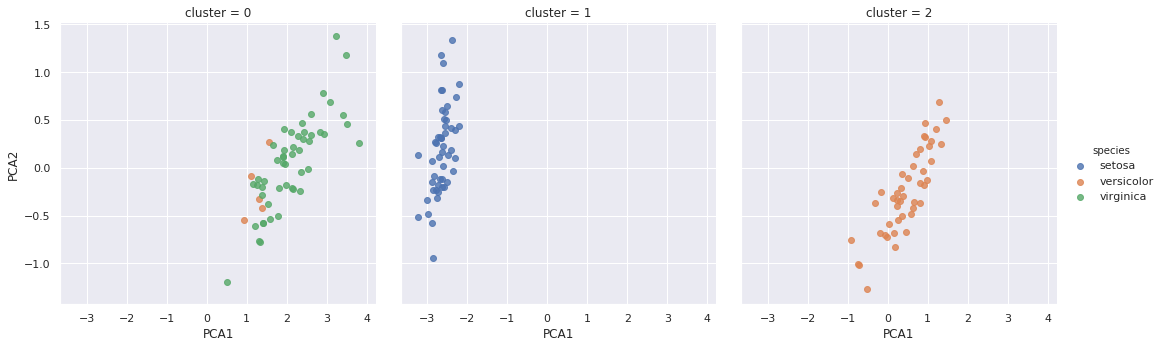

In [28]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',col='cluster', fit_reg=False);

### Example: Handwritten Digits

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is in a 3D array containing:
 - 1797 samples
 - each image is in a 8X8 grid of pixels

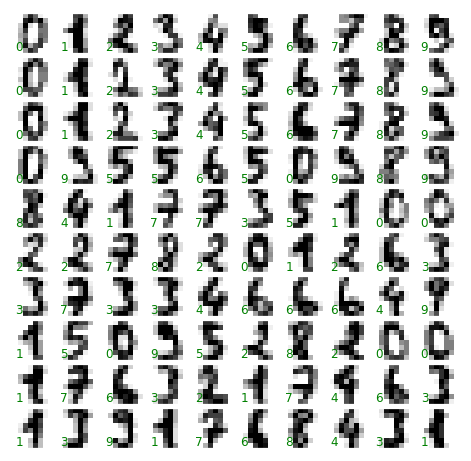

In [31]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

We will flatten the image such that each image is represented by an array of 64 pixels

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

Now, we will reduce the number of dimensions from 64 to 2 to help us with visualization. We will use a manifold learning algorithm called **Isomap** to transform the data into 2 dimensions

In [34]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

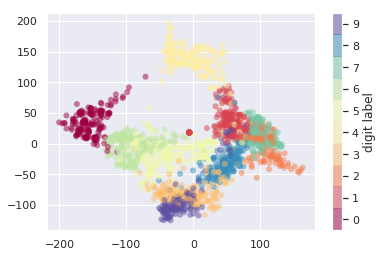

In [36]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

The plot gives us a good intuition on how various numbers are separated in the 64 dimensional space

**Applying a classification algorithm**

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Now, we plot a confusion matrix to find out exactly which digits are being classified wrongly

Text(89.18, 0.5, 'true value')

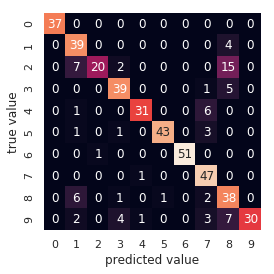

In [40]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

We can see that a large number of 2s are misclassified as 1s and 8s

Now, we will plot the inputs again with their predicted labels. We will use green for correct labels and red for incorrect labels. 

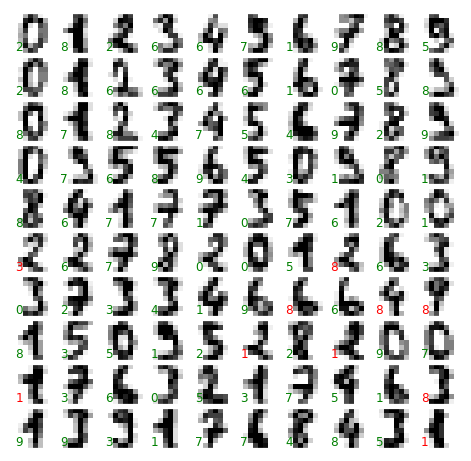

In [41]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')